Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | LastName, FirstName
**Section** | CPE31Sx
**Date Performed**: |
**Date Submitted**: |
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [13]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [3]:
test_data = read_images("dataset")
print(test_data)

[[array([[ 83,  87,  87, ...,  96, 102, 101],
       [ 78,  83,  84, ..., 101,  97,  99],
       [ 73,  80,  85, ...,  98,  92,  96],
       ...,
       [ 48,  50,  51, ...,  43,  47,  53],
       [ 50,  51,  51, ...,  42,  46,  50],
       [ 49,  49,  50, ...,  43,  46,  50]], dtype=uint8), array([[110, 109, 107, ...,  91, 105, 118],
       [109, 110, 109, ...,  91, 109, 113],
       [108, 111, 112, ...,  86, 109, 109],
       ...,
       [ 76,  77,  77, ...,  50,  52,  56],
       [ 75,  76,  77, ...,  47,  49,  53],
       [ 74,  75,  76, ...,  44,  46,  51]], dtype=uint8), array([[112, 111, 106, ...,  51,  64,  82],
       [110, 110, 106, ...,  50,  62,  81],
       [110, 110, 107, ...,  46,  59,  82],
       ...,
       [ 77,  76,  74, ...,  45,  49,  51],
       [ 75,  75,  72, ...,  43,  46,  49],
       [ 76,  75,  73, ...,  41,  45,  48]], dtype=uint8), array([[112, 111, 106, ...,  51,  64,  82],
       [110, 110, 106, ...,  50,  62,  81],
       [110, 110, 107, ...,  46,  59,

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

> THe function above correctly walks through the dataset folder and it successfully read all the images inside this folder. It converts them to greyscale and resizes them into 200x200 pixels. Lastly, it assigns label 0 on the first and 1 on the following.

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [14]:
def face_rec():
    names = ["CJ", "Mia"]  # Put your names here for faces to recognize

    [X, y] = read_images("dataset")
    y = np.asarray(y, dtype=np.int32)

    #EigenFace Recognizer
    model = cv2.face.EigenFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    while True:
        ret, img = camera.read()
        if not ret:
            break

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi = gray_img[y:y + h, x:x + w]
            roi = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label, confidence = model.predict(roi)
                name = names[label]
                cv2.putText(img, f"{name}, {round(confidence, 2)}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("Face Recognition", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()


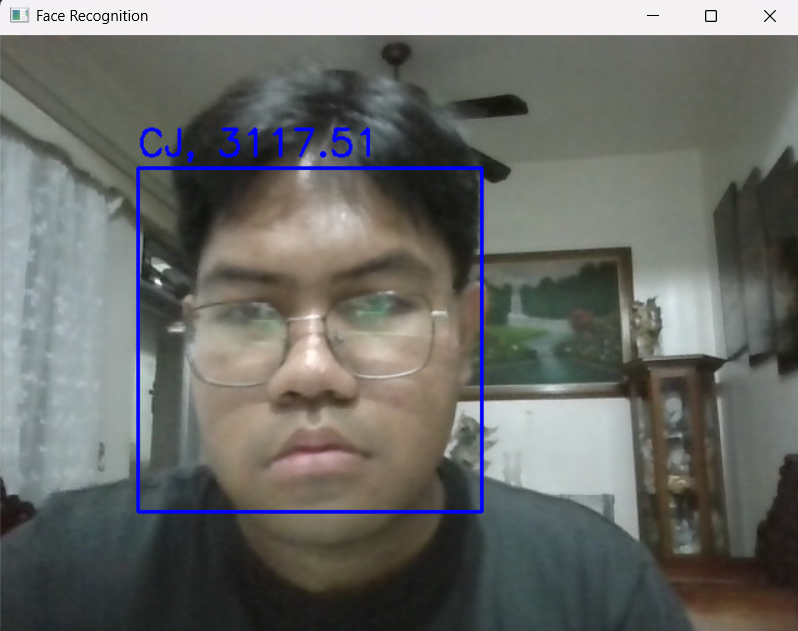

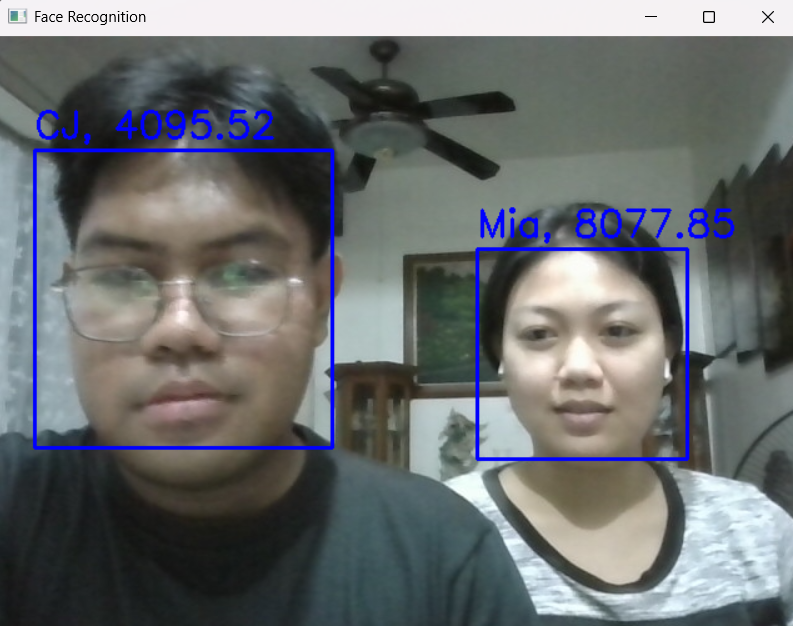

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

> The sample codes label the faces with the names of the people in the dataset. I have encountered an error as the face does not work in the cv2 version that I am using but iwas fixed by installing opencv-contrib-python. Lastly, I encountered an error by putting incorrect labels but I was able to fix it.

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

> From the above image, we could see that it returns the label and the confidence level. Lower values indicate better recognition based on the training dataset.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

In [18]:
import numpy as np
import os
import cv2

def read_images(path, sz=(200, 200)):
    X, y = [], []
    label_map = {}  
    label_counter = 0

    for dirname, dirnames, filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)

            if subdirname not in label_map:
                label_map[subdirname] = label_counter
                label_counter += 1

            for filename in os.listdir(subject_path):
                filepath = os.path.join(subject_path, filename)
                im = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

                if im is None:
                    continue

                if sz is not None:
                    im = cv2.resize(im, sz)

                X.append(np.asarray(im, dtype=np.uint8))
                y.append(label_map[subdirname])  

    return [X, y]

def test_model(model, model_name, names):
    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    print(f"Testing {model_name}...")

    correct = 0
    total_tests = 20  # Perform 20 tests
    test_count = 0

    while test_count < total_tests:
        ret, img = camera.read()
        if not ret:
            continue

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

        for (x, y, w, h) in faces:
            roi = gray_img[y:y + h, x:x + w]
            roi = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label, confidence = model.predict(roi)
                name = names[label] if label < len(names) else "Unknown"

                if name == "Recognized":
                    correct += 1

                cv2.putText(img, f"{name}, {round(confidence, 2)}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

            except:
                continue

        cv2.imshow(f"{model_name} Face Recognition", img)
        test_count += 1

        if cv2.waitKey(500) & 0xFF == ord("q"):
            break

    accuracy = (correct / total_tests) * 100
    print(f"{model_name} Accuracy: {accuracy:.2f}%")
    camera.release()
    cv2.destroyAllWindows()

def face_rec():
    names = ["Recognized", "Not Recognized"]  
    [X, y] = read_images("dataset")
    y = np.asarray(y, dtype=np.int32)

    if len(X) == 0:
        print("Error: No images found in dataset!")
        return

    # EigenFace Recognizer
    eigen_model = cv2.face.EigenFaceRecognizer_create()
    eigen_model.train(X, y)
    test_model(eigen_model, "EigenFace", names)

    # FisherFace Recognizer
    fisher_model = cv2.face.FisherFaceRecognizer_create()
    fisher_model.train(X, y)
    test_model(fisher_model, "FisherFace", names)

    # LBPH Recognizer
    lbph_model = cv2.face.LBPHFaceRecognizer_create()
    lbph_model.train(X, y)
    test_model(lbph_model, "LBPH", names)

if __name__ == "__main__":
    face_rec()


Testing EigenFace...
EigenFace Accuracy: 100.00%
Testing FisherFace...
FisherFace Accuracy: 75.00%
Testing LBPH...
LBPH Accuracy: 100.00%


> Both EigenFace and LBPH Recognizer were  able to obtain 100% accuracy in all 20 test cases, which means that both of them were able to distinguish between recognized and not recognized image. Hence, both demonstrated robustness in face recognition. However, FisherFace Recognition only achieved 75% accuracy which means that it struggled in some instances which may be on the difference on lighting, angles, or facial expression. 

## 5. Summary, Conclusions and Lessons Learned

> In this activity, I explored face recognition model implementation and testing using OpenCV. The results shows that EigenFace and LBPH are most accurate and FisherFace Recognition made few classification errors. I faced difficulties during the procedure where the provided code with the face module using cv2 is not recognized and had struggled in fixing since I have different enviroments for python like Anaconda. It took me some time before that error was fixed. I also encountered image processing errors and resizing issues which needed troubleshooting and modifications. This activity made me realize the importance of high-quality datasets, proper model selection, and effective debugging skills to create a model with high accuracy. Overall, this activity provided me more knowledge about the use of computer vision in face recognition.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*